In [167]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [155]:
data = pd.read_csv("Datasets/victimas-en-carpetas-de-investigacion-pgj.csv")
carpetas_investigacion_df_todo = pd.DataFrame(data)
carpetas_investigacion_df = pd.DataFrame(data)
carpetas_investigacion_df.head()

,idCarpeta,Año_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,...,FechaHecho,HoraHecho,HoraInicio,geopoint,AlcaldiaHechos,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud
0,8368986,2019,Marzo,01/03/2019,DESPOJO,DELITO DE BAJO IMPACTO,Masculino,22.0,FISICA,OFENDIDO,...,28/02/2019,21:25,00:02,"19.30415,-99.04778",TLAHUAC,SANTA ANA PONIENTE,AMADO NERVO,ROSAL,19.30415,-99.04778
1,8368989,2019,Marzo,01/03/2019,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,39.0,FISICA,VICTIMA Y DENUNCIANTE,...,28/02/2019,22:30,00:10,"19.48632,-99.14772",GUSTAVO A MADERO,NUEVA VALLEJO,NORTE 221,PONIENTE 126,19.48632,-99.14772
2,8368990,2019,Marzo,01/03/2019,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,VICTIMA Y DENUNCIANTE,...,16/01/2019,06:30,00:11,NaN,COACALCO DE BERRIOZABAL,NaN,"COACALCO, EDO. DE MEXICO",NaN,NaN,NaN
3,8368994,2019,Marzo,01/03/2019,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,NaN,NaN,MORAL,AGRAVIADO,...,28/02/2019,22:53,00:35,"19.45094,-99.21988",MIGUEL HIDALGO,PERIODISTA,BOLUEVARD MANUEL AVILA CAMACHO,NaN,19.45094,-99.21988
4,8368994,2019,Marzo,01/03/2019,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,NaN,NaN,MORAL,OFENDIDO,...,28/02/2019,22:53,00:35,"19.45094,-99.21988",MIGUEL HIDALGO,PERIODISTA,BOLUEVARD MANUEL AVILA CAMACHO,NaN,19.45094,-99.21988


In [144]:
categorias = carpetas_investigacion_df.groupby('Categoria').count().index
categorias

Index(['DELITO DE BAJO IMPACTO', 'FEMINICIDIO', 'HECHO NO DELICTIVO',
       'HOMICIDIO DOLOSO', 'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
       'ROBO A CASA HABITACIÓN CON VIOLENCIA',
       'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
       'ROBO A NEGOCIO CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
       'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
       'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA',
       'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA', 'SECUESTRO', 'VIOLACIÓN'],
      dtype='object', name='Categoria')

In [145]:
for i in categorias_innecesarias:
   carpetas_investigacion_df =  carpetas_investigacion_df.drop(carpetas_investigacion_df[
       carpetas_investigacion_df["Categoria"] == i].index)

carpetas_investigacion_df = carpetas_investigacion_df.drop(carpetas_investigacion_df[
    carpetas_investigacion_df["Sexo"] != "Femenino"].index)

carpetas_investigacion_df = carpetas_investigacion_df.drop(carpetas_investigacion_df[
    carpetas_investigacion_df["TipoPersona"] != "FISICA"].index)

In [146]:
carpetas_investigacion_df.groupby('Sexo').count().index

Index(['Femenino'], dtype='object', name='Sexo')

In [147]:
delitos= carpetas_investigacion_df.groupby('Delito').count().index
for delito in delitos:
    print("'" + delito + "',")

'ABORTO',
'ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA',
'ABUSO DE CONFIANZA',
'ABUSO SEXUAL',
'ACOSO SEXUAL',
'ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES',
'ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL',
'AMENAZAS',
'ATAQUES A LA PAZ PUBLICA',
'BIGAMIA',
'COBRANZA ILEGITIMA',
'COHECHO',
'CONTRA EL CUMPLIMIENTO DE LA OBLIGACION ALIMENTARIA',
'CONTRA EL ESTADO CIVIL',
'CONTRA FUNCIONARIOS PUBLICOS',
'CONTRA LA INTIMIDAD SEXUAL',
'CORRUPCIÓN DE PERSONAS MENORES DE EDAD O PERSONAS QUE NO TENGAN CAPACIDAD PARA COMPRENDER EL SIGNIFICADO DEL HECHO O DE PERSONAS QUE NO TENGAN CAPACIDAD DE RESISTIR LA CONDUCTA',
'DAÑO EN PROPIEDAD AJENA CULPOSA',
'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL',
'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES',
'DAÑO EN PROPIEDAD AJENA INTENCIONAL',
'DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL',
'DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES',
'DAÑO EN PROPIEDAD AJENA

In [148]:
delitos_innecesarios = ['ABORTO',
'ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA',
'ABUSO DE CONFIANZA',
'ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL',
'ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE)',
'ATAQUE A LAS VIAS GENERALES DE COMUNICACIÓN',
'ATAQUES A LA PAZ PUBLICA',
'BIGAMIA',
'COALICIÓN DE SERVIDORES PÚBLICOS',
'COBRANZA ILEGITIMA',
'COHECHO',
'CONCUSION',
'CONTRA EL CUMPLIMIENTO DE LA OBLIGACION ALIMENTARIA',
'CONTRA EL ESTADO CIVIL',
'CONTRA FUNCIONARIOS PUBLICOS',
'DAÑO EN PROPIEDAD AJENA CULPOSA',
'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL',
'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES',
'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A VIAS DE COMUNICACION',
'DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL',
'DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES',
'DAÑO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION',
'DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO',
'DAÑO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE COMUNICACION',
'DAÑO SUELO (ACTIVIDAD, INVASIÓN O EXTRACCIÓN)',
'DDH ANONIMAS',
'DDH CERESO',
'DDH FDS',
'DDH FRVT',
'DDH OFICIO COLABORACION',
'DDH OTRAS MATERIAS',
'DDH REDES',
'DDH RELACIONADAS',
'DDH SIN DATOS',
'DELITOS AMBIENTALES',
'DELITOS CONTRA LA SALUD',
'DELITOS DE ABOGADOS, PATRONOS, LITIGANTES Y ASESORES JURIDICOS',
'DELITOS ELECTORALES',
'DENUNCIA DE HECHOS',
'DESAPARICION FORZADA DE PERSONAS',
'DESOBEDENCIA DE PARTICULARES',
'DESOBEDIENCIA Y RESISTENCIA DE PARTICULARES',
'DESPOJO',
'DIFAMACION',
'DISCRIMINACION',
'EJERCICIO ILEGAL Y ABANDONO DEL SERVICIO PUBLICO',
'ENCUBRIMIENTO',
'ENCUBRIMIENTO POR FAVORECIMIENTO Y RECEPTACIÓN',
'ENRIQUECIMIENTO ILICITO',
'ENTREGA ILEGITIMA DE UN MENOR',
'EVASION DE PRESOS',
'EXTORSION',
'FABRICACION, COMERCIALIZACION Y USO INDEBIDO DE INSIGNIAS Y UNIFORMES',
'FALSEDAD ANTE AUTORIDADES',
'FALSIFICACION O ALTERACION Y USO INDEBIDO DE DOCUMENTOS',
'FALSIFICACIÓN DE SELLOS, MARCAS, LLAVES, CUÑOS, TROQUELES, CONTRASEÑAS Y OTROS',
'FRAUDE',
'HOMICIDIO CULPOSO CON EXCLUYENTES DE RESPONSABILIDAD',
'HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO)',
'HOMICIDIO CULPOSO FUERA DEL D.F (COLISION)',
'HOMICIDIO CULPOSO POR ARMA DE FUEGO',
'HOMICIDIO CULPOSO POR INSTRUMENTO PUNZO CORTANTE',
'HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR',
'HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (ATROPELLADO)',
'HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (CAIDA)',
'HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (COLISION)',
'LA ADMINISTRACION DE JUSTICIA',
'LESIONES CULPOSAS ACCIDENTE LABORAL',
'LESIONES CULPOSAS CON EXCLUYENTES DE RESPONSABILIDAD',
'LESIONES CULPOSAS POR CAIDA',
'LESIONES CULPOSAS POR CAIDA DE VEHÍCULO EN MOVIMIENTO',
'LESIONES CULPOSAS POR TRANSITO VEHICULAR',
'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION',
'LEY FEDERAL DE ARMAS DE FUEGO Y EXPLOSIVOS',
'MALTRATO ANIMAL',
'NARCOMENUDEO POSESION SIMPLE',
'NARCOMENUDEO POSESIÓN CON FINES DE VENTA, COMERCIO Y SUMINISTRO',
'NEGACION DEL SERVICIO PUBLICO',
'OMISION DE AUXILIO O DE CUIDADO',
'OPERACIONES CON RECURSOS DE PROCEDENCIA ILICITA',
'OPOSICION A QUE SE EJECUTE ALGUNA OBRA O TRABAJO PUBLICOS',
'PANDILLA, ASOCIACIÓN DELICTUOSA Y DELINCUENCIA ORGANIZADA',
'PECULADO',
'PERDIDA DE LA VIDA POR ACCIDENTE LABORAL',
'PERDIDA DE LA VIDA POR AHOGAMIENTO',
'PERDIDA DE LA VIDA POR CAIDA',
'PERDIDA DE LA VIDA POR CONGESTION ALCOHOLICA',
'PERDIDA DE LA VIDA POR DERRUMBE',
'PERDIDA DE LA VIDA POR ENFERMEDAD',
'PERDIDA DE LA VIDA POR INTOXICACION',
'PERDIDA DE LA VIDA POR OTRAS CAUSAS',
'PERDIDA DE LA VIDA POR PARO CARDIACO',
'PERDIDA DE LA VIDA POR PRECIPITACION',
'PERDIDA DE LA VIDA POR QUEMADURA',
'PERDIDA DE LA VIDA POR SUICIDIO',
'PERDIDA DE LA VIDA POR SUICIDIO EN EL METRO',
'PERSONAS EXTRAVIADAS Y AUSENTES',
'PLAGIO O SECUESTRO',
'PORNOGRAFÍA',
'PORTACION DE ARMA DE FUEGO',
'PORTACIÓN, FABRICACIÓN E IMPORTACIÓN DE OBJETOS APTOS PARA AGREDIR',
'POSESION DE VEHICULO ROBADO',
'PRIV. ILEGAL DE LA LIB. Y ROBO DE VEHICULO',
'PRIVACION DE LA LIBERTAD PERSONAL',
'PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)',
'PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCIÓN, ALTERACIÓN O FALSIFICACIÓN DE TÍTULOS AL PORTADOR, DOCUMENTOS DE CRÉDITO PÚBLICOS O VALES DE CANJE',
'QUEBRANTAMIENTO DE SELLOS',
'RESPONSABILIDAD PROFESIONAL Y TECNICA',
'RETENCIÓN O SUSTRACCIÓN DE MENORES INCAPACES',
'REVELACION DE SECRETOS',
'ROBO A CASA HABITACION CON VIOLENCIA',
'ROBO A CASA HABITACION SIN VIOLENCIA',
'ROBO A CASA HABITACION Y VEHICULO CON VIOLENCIA',
'ROBO A CASA HABITACION Y VEHICULO SIN VIOLENCIA',
'ROBO A LOCALES SEMIFIJOS (PUESTOS DE ALIMENTOS,BEBIDAS, ENSERES, PERIODICOS,LOTERIA, OTROS)',
'ROBO A NEGOCIO CON VIOLENCIA',
'ROBO A NEGOCIO CON VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO)',
'ROBO A NEGOCIO CON VIOLENCIA POR FARDEROS (TIENDAS DE CONVENIENCIA)',
'ROBO A NEGOCIO SIN VIOLENCIA',
'ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO)',
'ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE CONVENIENCIA)',
'ROBO A NEGOCIO Y VEHICULO CON VIOLENCIA',
'ROBO A NEGOCIO Y VEHICULO SIN VIOLENCIA',
'ROBO A OFICINA PÚBLICA CON VIOLENCIA',
'ROBO A OFICINA PÚBLICA SIN VIOLENCIA',
'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA',
'ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA',
'ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA',
'ROBO A PASAJERO A BORDO DE METROBUS CON VIOLENCIA',
'ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA',
'ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CON VIOLENCIA',
'ROBO A PASAJERO A BORDO DE PESERO COLECTIVO SIN VIOLENCIA',
'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA',
'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA',
'ROBO A PASAJERO EN AUTOBUS FORANEO SIN VIOLENCIA',
'ROBO A PASAJERO EN AUTOBÚS FORÁNEO CON VIOLENCIA',
'ROBO A PASAJERO EN RTP CON VIOLENCIA',
'ROBO A PASAJERO EN RTP SIN VIOLENCIA',
'ROBO A PASAJERO EN TREN LIGERO CON VIOLENCIA',
'ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA',
'ROBO A PASAJERO EN TREN SUBURBANO CON VIOLENCIA',
'ROBO A PASAJERO EN TREN SUBURBANO SIN VIOLENCIA',
'ROBO A PASAJERO EN TROLEBUS CON VIOLENCIA',
'ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA',
'ROBO A REPARTIDOR CON VIOLENCIA',
'ROBO A REPARTIDOR SIN VIOLENCIA',
'ROBO A REPARTIDOR Y VEHICULO CON VIOLENCIA',
'ROBO A REPARTIDOR Y VEHICULO SIN VIOLENCIA',
'ROBO A SUCURSAL BANCARIA CON VIOLENCIA',
'ROBO A SUCURSAL BANCARIA DENTRO DE  TIENDAS DE AUTOSERVICIO S/V',
'ROBO A TRANSEUNTE A BORDO DE TAXI PUBLICO Y PRIVADO SIN VIOLENCIA',
'ROBO A TRANSEUNTE A BORDO DE TAXI PÚBLICO Y PRIVADO CON VIOLENCIA',
'ROBO A TRANSEUNTE CONDUCTOR DE TAXI PUBLICO Y PRIVADO CON VIOLENCIA',
'ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA',
'ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA',
'ROBO A TRANSEUNTE EN HOTEL CON VIOLENCIA',
'ROBO A TRANSEUNTE EN NEGOCIO CON VIOLENCIA',
'ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIOLENCIA',
'ROBO A TRANSEUNTE EN RESTAURANT CON VIOLENCIA',
'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
'ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA',
'ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLENCIA',
'ROBO A TRANSEUNTE SALIENDO DEL CAJERO CON VIOLENCIA',
'ROBO A TRANSPORTISTA Y VEHICULO PESADO CON VIOLENCIA',
'ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIOLENCIA',
'ROBO DE ACCESORIOS DE AUTO',
'ROBO DE ALHAJAS',
'ROBO DE ANIMALES',
'ROBO DE ARMA',
'ROBO DE CONTENEDORES DE TRAILERS S/V',
'ROBO DE DINERO',
'ROBO DE DOCUMENTOS',
'ROBO DE FLUIDOS',
'ROBO DE MAQUINARIA CON VIOLENCIA',
'ROBO DE MERCANCIA EN CONTENEDEROS EN ÁREAS FEDERALES',
'ROBO DE MOTOCICLETA CON VIOLENCIA',
'ROBO DE MOTOCICLETA SIN VIOLENCIA',
'ROBO DE OBJETOS',
'ROBO DE OBJETOS A ESCUELA',
'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
'ROBO DE PLACA DE AUTOMOVIL',
'ROBO DE VEHICULO DE PEDALES',
'ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE CON VIOLENCIA',
'ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE SIN VIOLENCIA',
'ROBO DE VEHICULO DE SERVICIO OFICIAL CON VIOLENCIA',
'ROBO DE VEHICULO DE SERVICIO OFICIAL SIN VIOLENCIA',
'ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA',
'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA',
'ROBO DE VEHICULO DE SERVICIO PÚBLICO CON VIOLENCIA',
'ROBO DE VEHICULO DE SERVICIO PÚBLICO SIN VIOLENCIA',
'ROBO DE VEHICULO ELECTRICO MOTOPATIN',
'ROBO DE VEHICULO EN PENSION, TALLER Y AGENCIAS S/V',
'ROBO EN EVENTOS MASIVOS (DEPORTIVOS, CULTURALES, RELIGIOSOS Y ARTISTICOS) S/V',
'ROBO EN INTERIOR DE EMPRESA (NOMINA) SIN VIOLENCIA',
'ROBO S/V DENTRO DE NEGOCIOS, AUTOSERVICIOS, CONVENIENCIA',
'SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN)',
'TENTATIVA DE EXTORSION',
'TENTATIVA DE FRAUDE',
'TENTATIVA DE ROBO',
'TENTATIVA DE ROBO DE VEHICULO',
'TENTATIVA DE SUICIDIO',
'TORTURA',
'TRAFICO DE INFLUENCIA',
'TRATA DE PERSONAS',
'USO DE DOCUMENTO FALSO',
'USO INDEBIDO DE ATRIBUCIONES Y FACULTADES',
'USURPACION DE FUNCIONES PUBLICAS',
'USURPACION DE PROFESION',
'USURPACIÓN DE IDENTIDAD',
'VARIACION DE NOMBRE O DOMICILIO',  
]

In [149]:
for i in delitos_innecesarios:
   carpetas_investigacion_df =  carpetas_investigacion_df.drop(carpetas_investigacion_df[
       carpetas_investigacion_df["Delito"] == i].index)

In [150]:
calidadjuridica = carpetas_investigacion_df.groupby('CalidadJuridica').count().index
calidadjuridicainnecesaria = [ 'CADAVER', 'OFENDIDO','OFENDIDO Y DENUNCIANTE']

In [151]:
for i in calidadjuridicainnecesaria:
   carpetas_investigacion_df =  carpetas_investigacion_df.drop(carpetas_investigacion_df[
       carpetas_investigacion_df["Categoria"] == i].index)

In [164]:
violencia_familiar_df_filtrado = carpetas_investigacion_df.loc[carpetas_investigacion_df[
    "Delito"] == "VIOLENCIA FAMILIAR"]
violencia_familiar_df_filtrado

,idCarpeta,Año_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,...,FechaHecho,HoraHecho,HoraInicio,geopoint,AlcaldiaHechos,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud
1,8368989,2019,Marzo,01/03/2019,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,39.0,FISICA,VICTIMA Y DENUNCIANTE,...,28/02/2019,22:30,00:10,"19.48632,-99.14772",GUSTAVO A MADERO,NUEVA VALLEJO,NORTE 221,PONIENTE 126,19.486320,-99.147720
41,8369138,2019,Marzo,01/03/2019,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,NaN,FISICA,VICTIMA Y DENUNCIANTE,...,03/02/2019,23:00,10:36,"19.38804,-99.06782",IZTACALCO,AGRÍCOLA ORIENTAL,CALLE SUR 22,NaN,19.388040,-99.067820
70,8369217,2019,Marzo,01/03/2019,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,80.0,FISICA,VICTIMA Y DENUNCIANTE,...,08/12/2017,19:00,11:58,"19.49379,-99.11763",GUSTAVO A MADERO,SANTA ISABEL TOLA,QUETZALCOATL,NaN,19.493790,-99.117630
87,8369282,2019,Marzo,01/03/2019,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,35.0,FISICA,VICTIMA Y DENUNCIANTE,...,01/03/2019,08:30,12:52,"19.36928,-99.1734",BENITO JUAREZ,DEL VALLE CENTRO,ADOLFO PRIETO,CERRADA BARTOLOACHE,19.369280,-99.173400
94,8369308,2019,Marzo,01/03/2019,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,30.0,FISICA,VICTIMA Y DENUNCIANTE,...,28/01/2019,07:33,13:07,"19.45477,-99.10249",GUSTAVO A MADERO,NUEVA TENOCHTITLAN,NORTE 88,NaN,19.454770,-99.102490
95,8369309,2019,Marzo,01/03/2019,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,NaN,FISICA,VICTIMA,...,23/02/2019,00:00,13:07,"19.52992,-99.14146",GUSTAVO A MADERO,BENITO JUÁREZ,KENNEDY,NEZA,19.529920,-99.141460
99,8369316,2019,Marzo,01/03/2019,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,4.0,FISICA,VICTIMA,...,09/02/2019,16:30,13:15,"19.32788,-99.0849",IZTAPALAPA,SAN JUAN XALPA,HIDALGO,NaN,19.327880,-99.084900
103,8369325,2019,Marzo,01/03/2019,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Masculino,47.0,FISICA,VICTIMA Y DENUNCIANTE,...,27/02/2019,10:00,13:20,"19.52695,-99.15551",GUSTAVO A MADERO,ACUEDUCTO DE GUADALUPE,CALLE DEL PUERTO,BOULEVRAD DEL TEMOLUCO,19.526950,-99.155510
118,8369401,2019,Marzo,01/03/2019,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,37.0,FISICA,VICTIMA Y DENUNCIANTE,...,18/02/2019,13:30,14:31,"19.41452,-99.13509",CUAUHTEMOC,OBRERA,MANUEL JOSE OTHON,NaN,19.414520,-99.135090
124,8369412,2019,Marzo,01/03/2019,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,21.0,FISICA,VICTIMA Y DENUNCIANTE,...,28/02/2019,21:00,14:38,"19.50862,-99.10088",GUSTAVO A MADERO,C.T.M. ATZACOALCO,RETORNO ELIAS F HURTADO,NaN,19.508620,-99.100880


In [159]:
violencia_familiar_df_2019 = violencia_familiar_df.loc[violencia_familiar_df["Año_inicio"] == 2019]

In [160]:
violencia_familiar_df_2020 = violencia_familiar_df.loc[violencia_familiar_df["Año_inicio"] == 2020]

In [168]:
violencia_familiar_df_2020
violencia_familiar_df_2020.to_csv('Datasets/violencia_familiar_df_2020', index = False)
violencia_familiar_df_2020.head()

,idCarpeta,Año_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,...,FechaHecho,HoraHecho,HoraInicio,geopoint,AlcaldiaHechos,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud
8004,8646705,2020,Marzo,01/03/2020,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,50.0,FISICA,VICTIMA Y DENUNCIANTE,...,09/02/2020,22:00,00:33,"19.5388807412,-99.143120089",GUSTAVO A MADERO,ZONA ESCOLAR ORIENTE,HERALDO,NaN,19.538881,-99.143120
8013,8646722,2020,Marzo,01/03/2020,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,50.0,FISICA,VICTIMA Y DENUNCIANTE,...,29/02/2020,21:30,01:16,"19.3920834279,-99.0913409681",IZTACALCO,GABRIEL RAMOS MILLÁN SECCIÓN BRAMADERO,SUR 181,NaN,19.392083,-99.091341
8014,8646724,2020,Marzo,01/03/2020,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,19.0,FISICA,VICTIMA Y DENUNCIANTE,...,28/02/2020,15:30,01:27,"19.3654454023,-99.0343067996",IZTAPALAPA,EJERCITO DE AGUA PRIETA,ANDADOR 6,NaN,19.365445,-99.034307
8027,8646763,2020,Marzo,01/03/2020,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,30.0,FISICA,VICTIMA Y DENUNCIANTE,...,29/02/2020,21:30,04:17,"19.3694816838,-98.9980444004",IZTAPALAPA,ERMITA ZARAGOZA,ANDADOR LUIS COLLADO,NaN,19.369482,-98.998044
8051,8646845,2020,Marzo,01/03/2020,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,50.0,FISICA,VICTIMA Y DENUNCIANTE,...,23/02/2020,15:00,11:09,"19.3819423018,-99.0432886996",IZTAPALAPA,CHINAMPAC DE JUÁREZ,FRENTES,NaN,19.381942,-99.043289


In [166]:
violencia_familiar_df_2019
violencia_familiar_df_2019.to_csv('Datasets/violencia_familiar_df_2019', index = False)

In [205]:
violencia_familiar_df_2019 = violencia_familiar_df_2019.sort_values(by="FechaInicio")
violencia_familiar_df_2020 = violencia_familiar_df_2020.sort_values(by="FechaInicio")

In [206]:
violencia_familiar_df_2019[['Dia','Mes', "Año"]] = violencia_familiar_df_2019.FechaInicio.str.split(
    "/",expand=True,)
violencia_familiar_df_2020[['Dia','Mes', "Año"]] = violencia_familiar_df_2020.FechaInicio.str.split(
    "/",expand=True,)

In [255]:
mean2019= round(violencia_familiar_df_2019.groupby(
    "FechaInicio")["Delito"].count().sum() / 31,2)

mean2020= round(violencia_familiar_df_2020.groupby(
    "FechaInicio")["Delito"].count().sum() / 31,2)


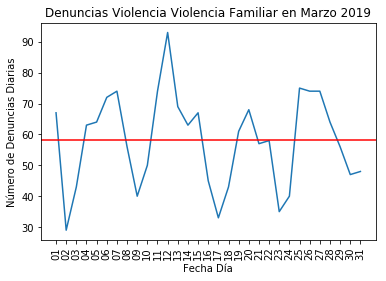

In [254]:
plt.plot(violencia_familiar_df_2019.groupby("Dia")["Delito"].count())
plt.axhline(y=mean2019, color='r', linestyle='-')
plt.xticks(rotation = 90)
plt.title("Denuncias Violencia Violencia Familiar en Marzo 2019")
plt.xlabel("Fecha Día")
plt.ylabel("Número de Denuncias Diarias")

plt.show()

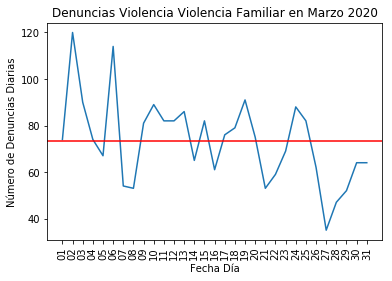

In [256]:
plt.plot(violencia_familiar_df_2020.groupby("Dia")["Delito"].count())
plt.xticks(rotation = 90)
plt.axhline(y=mean2020, color='r', linestyle='-')
plt.title("Denuncias Violencia Violencia Familiar en Marzo 2020")
plt.xlabel("Fecha Día")
plt.ylabel("Número de Denuncias Diarias")
plt.show()

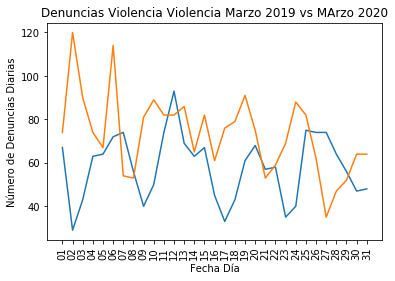

In [257]:
plt.plot(violencia_familiar_df_2019.groupby("Dia")["Delito"].count())
plt.plot(violencia_familiar_df_2020.groupby("Dia")["Delito"].count())
plt.xticks(rotation = 90)
plt.title("Denuncias Violencia Violencia Marzo 2019 vs MArzo 2020")
plt.xlabel("Fecha Día")
plt.ylabel("Número de Denuncias Diarias")
plt.savefig("violencia2109vs2020.png")
plt.show()